In [20]:
## initialization 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [8]:
## Loading datasets and set the variables

data= datasets.load_wine(as_frame = True)

x=data.data
y=data.target


In [9]:
## split the whole datasets in train and test datasets

x_train, x_test, y_train, y_test= train_test_split(x , y , test_size=.25, random_state=19)

In [10]:
## setting multiple estimator to check best accuracy model

estimator_range= [2,4,6,8,10,12,14,16]

In [15]:
## Run the bagging method

models= []
scores= []

for n_estimator in estimator_range:
    
    # Create bagging classifier
    
    clf = BaggingClassifier(n_estimators = n_estimator, random_state = 19)
    
    ## Fit the model
    
    clf.fit( x_train, y_train)
    
    ## Append the model and scores to their respective list
    
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(x_test)))

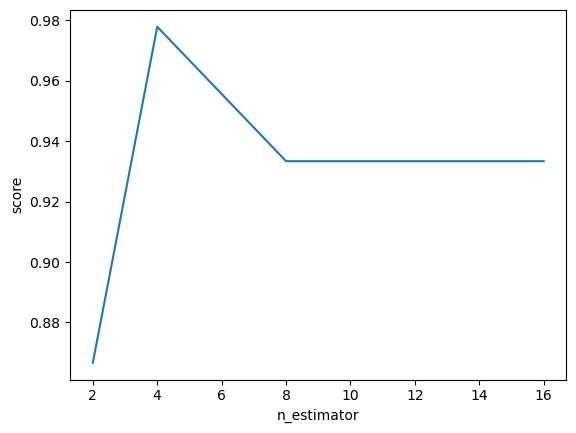

In [25]:
## plot the scores against n_estimator

plt.plot( estimator_range, scores)
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.show()

Here, we can see for number of estimator when 4 , then it shows the best accuracy and decresses by the number of parameter incresses. So, we can conclude that number of parameter is 4 is the best choice for the model

# Generating Decision Trees from Bagging Classifier

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[Text(0.5, 0.8333333333333334, 'od280/od315_of_diluted_wines <= 2.04\ngini = 0.662\nsamples = 79\nvalue = [49, 47, 37]'),
 Text(0.25, 0.5, 'color_intensity <= 3.45\ngini = 0.139\nsamples = 25\nvalue = [0, 3, 37]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 3, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 23\nvalue = [0, 0, 37]'),
 Text(0.75, 0.5, 'alcohol <= 13.04\ngini = 0.499\nsamples = 54\nvalue = [49, 44, 0]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 25\nvalue = [0, 44, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 29\nvalue = [49, 0, 0]')]

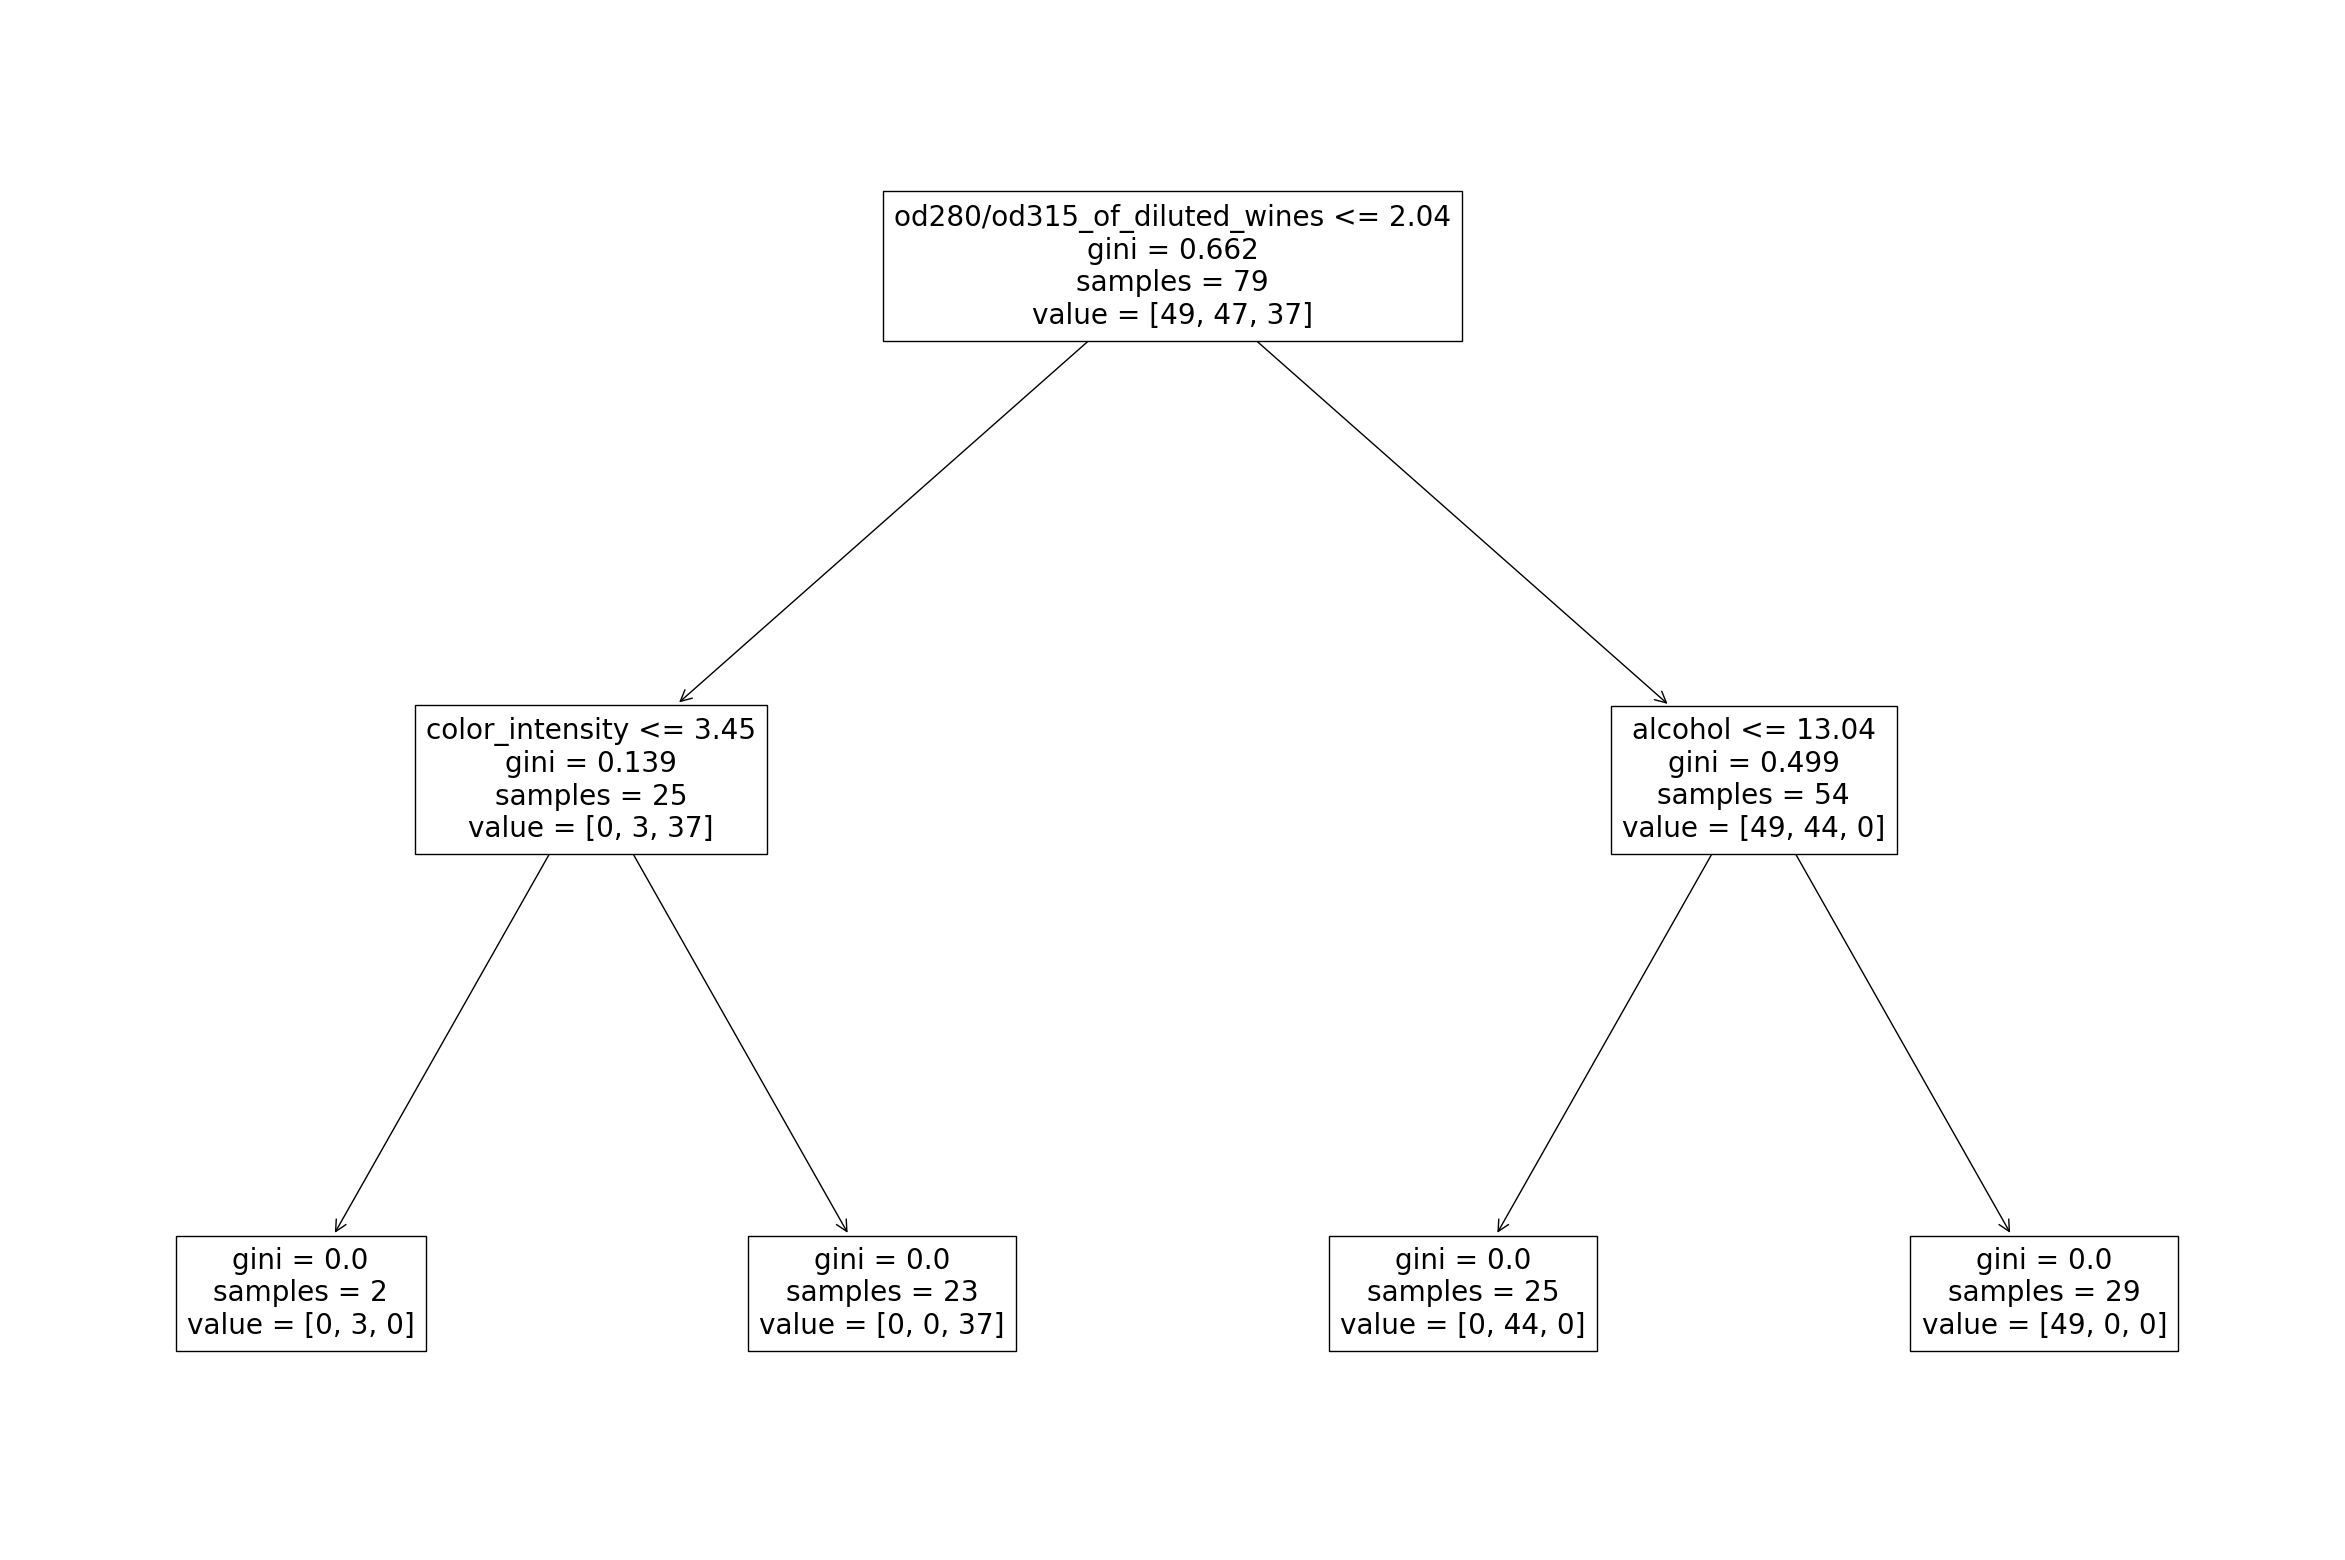

In [30]:
clf = BaggingClassifier(n_estimators = 4 , oob_score= True, random_state = 19)

clf.fit(x_train, y_train)

plt.figure(figsize= (30,20))
plot_tree(clf.estimators_[0] , feature_names = x.columns)